In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import io
import json
import logging
import os

import torch

import openpifpaf
import openpifpaf.eval_coco

CWD = os.path.join(os.path.dirname(openpifpaf.__file__), '..')

# Instance Scale Distribution with Training and Eval Setting

In [2]:
from pythonjsonlogger import jsonlogger

STATS_STREAM = io.StringIO()
stream_handler = logging.StreamHandler(STATS_STREAM)
stream_handler.setFormatter(jsonlogger.JsonFormatter('(message)'))
stream_handler.setLevel(logging.DEBUG)

logger = logging.getLogger('openpifpaf.stats')
logger.setLevel(logging.DEBUG)
logger.addHandler(stream_handler)

In [3]:
train_preprocess = openpifpaf.datasets.train_preprocess_factory('cocokp', square_edge=385)
train_data = openpifpaf.datasets.Coco(
    image_dir=os.path.join(CWD, openpifpaf.datasets.factory.IMAGE_DIR_TRAIN),
    ann_file=os.path.join(CWD, openpifpaf.datasets.factory.ANNOTATIONS_TRAIN),
    preprocess=train_preprocess,
    image_filter='keypoint-annotations',
    category_ids=[1],
    n_images=500,
)

loading annotations into memory...
Done (t=10.63s)
creating index...
index created!


In [4]:
logging.getLogger('openpifpaf.stats').debug({'data': 'train'})
for sample_i, _ in enumerate(train_data):
    if sample_i % 50 == 0:
        print(sample_i)
stream_handler.flush()

0
50
100
150
200
250
300
350
400
450


In [5]:
eval_data = openpifpaf.datasets.Coco(
    image_dir=os.path.join(CWD, openpifpaf.datasets.factory.IMAGE_DIR_TRAIN),
    ann_file=os.path.join(CWD, openpifpaf.datasets.factory.ANNOTATIONS_TRAIN),
    preprocess=openpifpaf.eval_coco.preprocess_factory(641, tight_padding=True),
    image_filter='keypoint-annotations',
    category_ids=[1],
    n_images=500,
)

loading annotations into memory...
Done (t=9.88s)
creating index...
index created!


In [6]:
logging.getLogger('openpifpaf.stats').debug({'data': 'eval'})
for sample_i, _ in enumerate(eval_data):
    if sample_i % 50 == 0:
        print(sample_i)
stream_handler.flush()

0
50
100
150
200
250
300
350
400
450


In [10]:
evalext_data = openpifpaf.datasets.Coco(
    image_dir=os.path.join(CWD, openpifpaf.datasets.factory.IMAGE_DIR_TRAIN),
    ann_file=os.path.join(CWD, openpifpaf.datasets.factory.ANNOTATIONS_TRAIN),
    preprocess=openpifpaf.eval_coco.preprocess_factory(321, tight_padding=True),
    image_filter='keypoint-annotations',
    category_ids=[1],
    n_images=500,
)
logging.getLogger('openpifpaf.stats').debug({'data': 'eval321'})
for sample_i, _ in enumerate(evalext_data):
    if sample_i % 50 == 0:
        print(sample_i)
stream_handler.flush()

loading annotations into memory...
Done (t=11.97s)
creating index...
index created!
0
50
100
150
200
250
300
350
400
450


In [11]:
data = {'train': [], 'eval': [], 'eval321': []}
current_dataset = None
for line in STATS_STREAM.getvalue().splitlines():
    line = json.loads(line)
    if 'data' in line:
        current_dataset = line['data']
    if current_dataset not in data:
        continue
    if 'bbox' in line:
        data[current_dataset].append(line['bbox'][3])

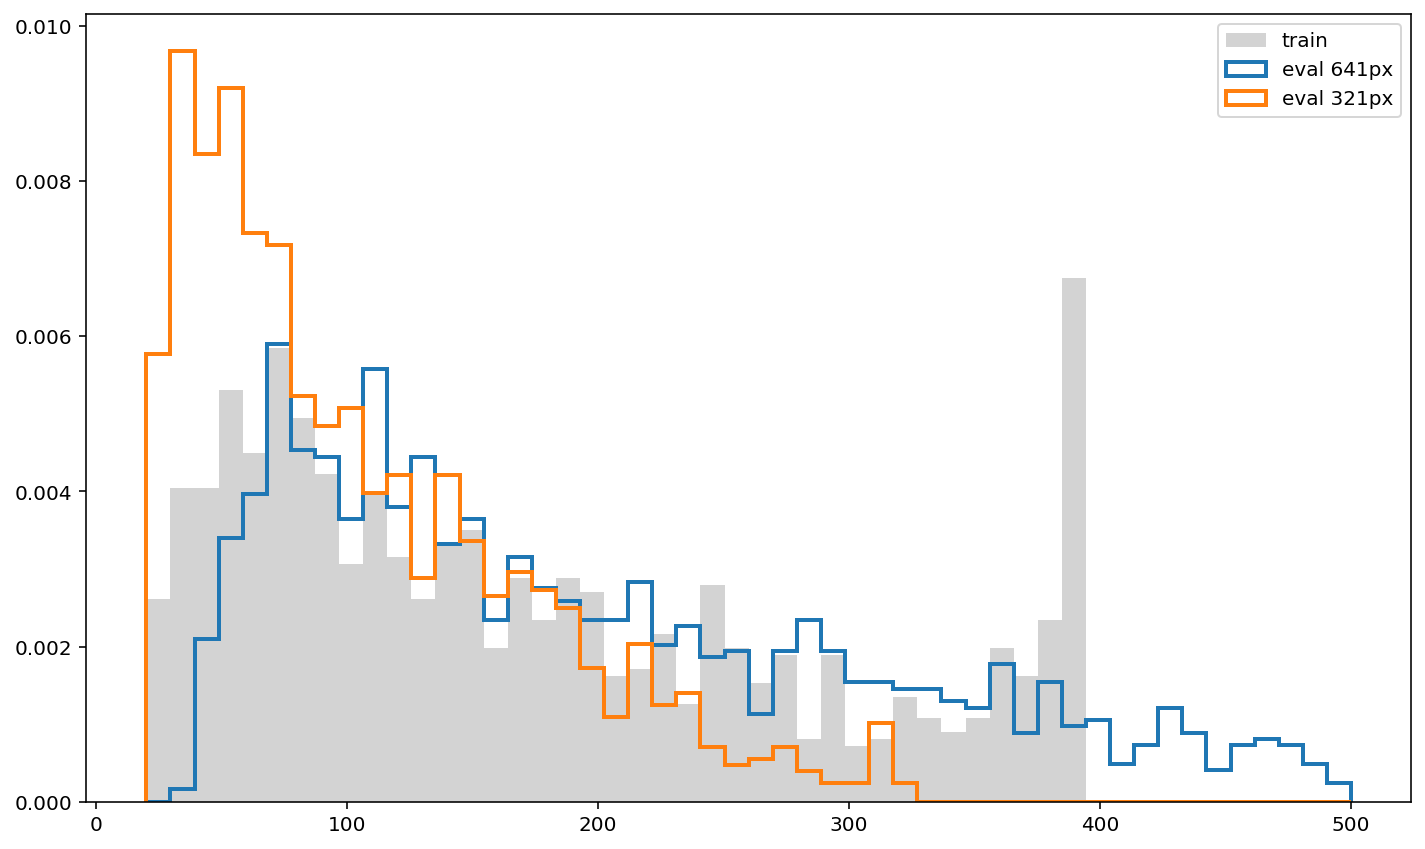

In [12]:
with openpifpaf.show.canvas() as ax:
    ax.hist(data['train'], bins=50, range=(20, 500), density=True, color='lightgray', label='train')
    ax.hist(data['eval'], bins=50, range=(20, 500), density=True, histtype='step', lw=2, label='eval 641px')
    ax.hist(data['eval321'], bins=50, range=(20, 500), density=True, histtype='step', lw=2, label='eval 321px')
    ax.legend()